# Detección de Fraude con Tarjetas de crédito
# Grupo 3
## Bruno Dueñas, Fernando Mejía, Mateo Córdova

# Importar librerías

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import tensorflow as tf
import graphviz

## Importando la data proveniente del csv y mostrando el contenido de la data

In [60]:
column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"]
dframe=pd.read_csv("data/card_transdata.csv")
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Encontrar las características de la data

In [61]:
dframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Copia para el modelo en keras

In [62]:
dframeKeras = dframe.copy()

## Copia para el arbol de decisión sklearn

In [63]:
dframeArbol = dframe.copy()

## Normalización de la data

In [64]:
scaler = StandardScaler()
dframe.iloc[:,0:-1] = scaler.fit_transform(dframe.iloc[:,0:-1].to_numpy())

In [65]:
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909,0.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425,0.0
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425,0.0
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909,0.0
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909,0.0


## Revisar valores nulos (de existir)

In [66]:
dframe.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Recuentos de valores para variables categóricas (repeat_retailer, used_chip, used_pin_number, online_order y fraude)

In [67]:
for column in dframe.columns[3:9]:
    print(dframe[column].value_counts())
    print()

 0.366584    881536
-2.727890    118464
Name: repeat_retailer, dtype: int64

-0.734443    649601
 1.361576    350399
Name: used_chip, dtype: int64

-0.334458    899392
 2.989911    100608
Name: used_pin_number, dtype: int64

 0.732909    650552
-1.364425    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



## Matriz de correlación entre la data

<AxesSubplot:>

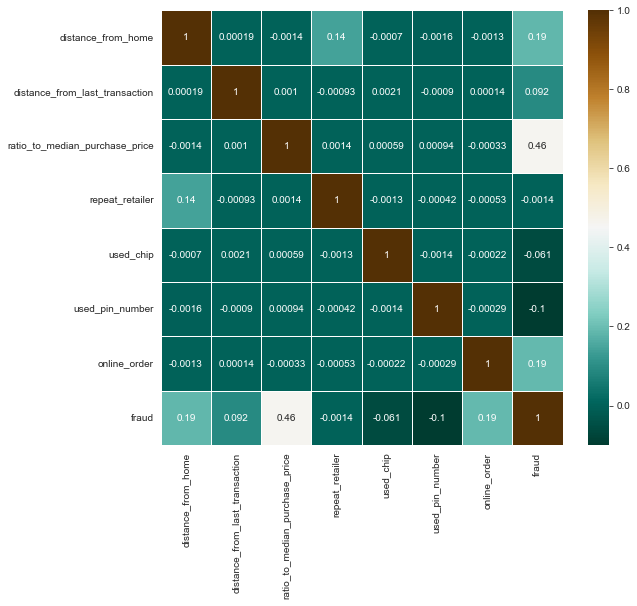

In [68]:
correlation_mat = dframe.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'BrBG_r',linewidths=0.5)

### Análisis univariado para eliminar la característica que tiene el menor efecto en la variable objetivo (fraude)

In [69]:
scores = []
Univ_Analysis = SelectKBest(score_func=f_classif, k=7)
fit = Univ_Analysis.fit(dframe[dframe.columns[0:7]], dframe[dframe.columns[7]])
newcols = Univ_Analysis.get_support(indices=True)
for i in range(7):
    print ("Columna: ",column_names[i], ", Puntuación: ", fit.scores_[i])
    scores.append(fit.scores_[i])
print("Más baja = ",min(scores))

Columna:  distance_from_home , Puntuación:  36465.69332586085
Columna:  distance_from_last_transaction , Puntuación:  8520.690791240206
Columna:  ratio_to_median_purchase_price , Puntuación:  271820.173833205
Columna:  repeat_retailer , Puntuación:  1.8426704992520047
Columna:  used_chip , Puntuación:  3731.7684653980787
Columna:  used_pin_number , Puntuación:  10160.776030233745
Columna:  online_order , Puntuación:  38263.51828118835
Más baja =  1.8426704992520047


### Dado que tenemos la puntuación más baja para repeat_retailer, la excluimos de nuestro análisis.

In [70]:
dframe.drop(['repeat_retailer'], axis=1, inplace=True)

## Separar la data en variables de entrenamiento y variables de prueba

In [71]:
train, test = train_test_split(dframe, test_size=0.2)

## Variables de entrenamiento y variables de prueba

In [72]:
## para entrenar
t_data = train[train.columns[0:6]]
t_target = train[train.columns[6]]
## para predicciones
w_test_pred = test[test.columns[0:6]].iloc[10:20]
w_true_pred = test[test.columns[6]].iloc[10:20]
## para validar el accuracy
w_test = test[test.columns[0:6]]
w_true = test[test.columns[6]]

## Arbol de decisión sklearn
### Entrenamiento del modelo

In [73]:
dframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,1.361576,-0.334458,0.732909,0.0


In [74]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

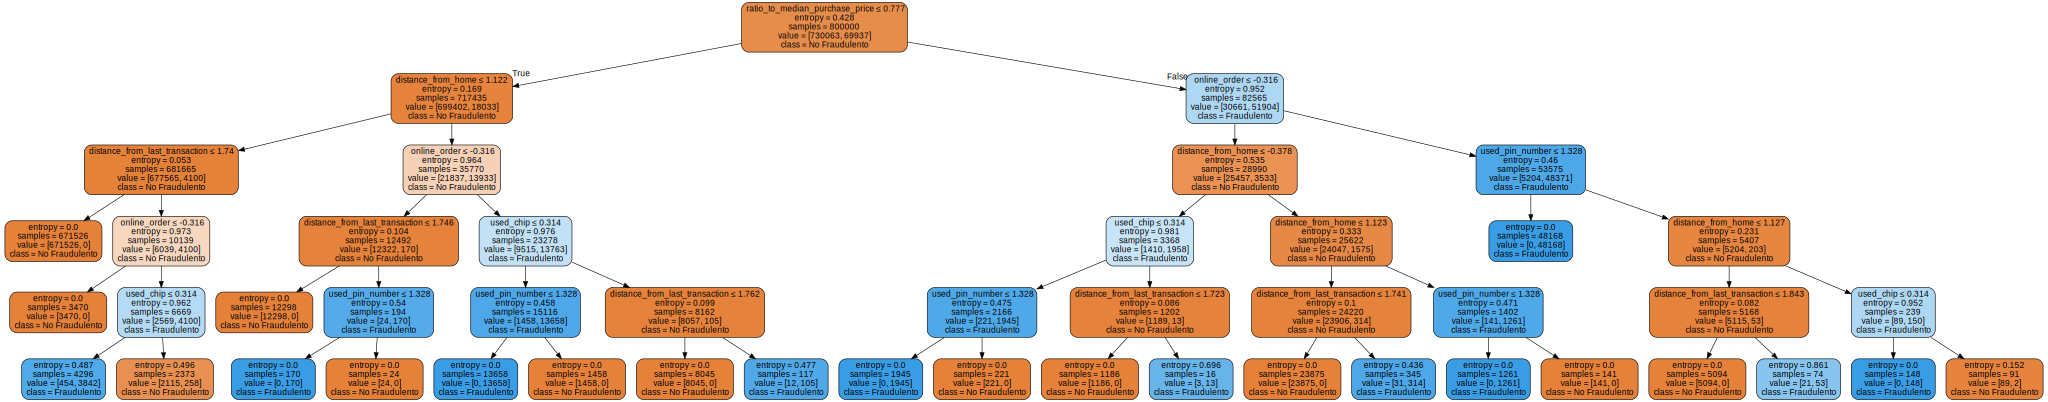

In [75]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Fraudulento", "Fraudulento"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [76]:
y_respuesta = clf.predict(w_test_pred)
for real, prd in zip(w_true_pred, y_respuesta):
  print('Real {} => Predicción {}'.format(real, prd))

Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0


## Evaluación del árbol de decisión

In [77]:
y_respuesta = clf.predict(w_test)

In [78]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Precisión del árbol de decisión: {}%'.format(acc * 100))

Precisión del árbol de decisión: 99.9085%


<AxesSubplot:>

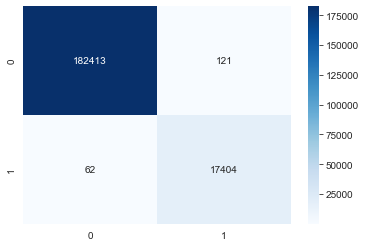

In [79]:
cfm = metrics.confusion_matrix(w_true, y_respuesta)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='g')

## Arbol de decisión sin tratamiento de datos

In [80]:
dframeArbol.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [81]:
trainSin, testSin = train_test_split(dframeArbol, test_size=0.2)

In [82]:
## para entrenar
t_data = trainSin[trainSin.columns[0:7]]
t_target = trainSin[trainSin.columns[7]]
## para predicciones
w_test_pred = testSin[testSin.columns[0:7]].iloc[10:20]
w_true_pred = testSin[testSin.columns[7]].iloc[10:20]
## para validar el accuracy
w_test = testSin[testSin.columns[0:7]]
w_true = testSin[testSin.columns[7]]

## Arbol de decisión sklearn
### Entrenamiento del modelo (Sin tratamiento de data)

In [83]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

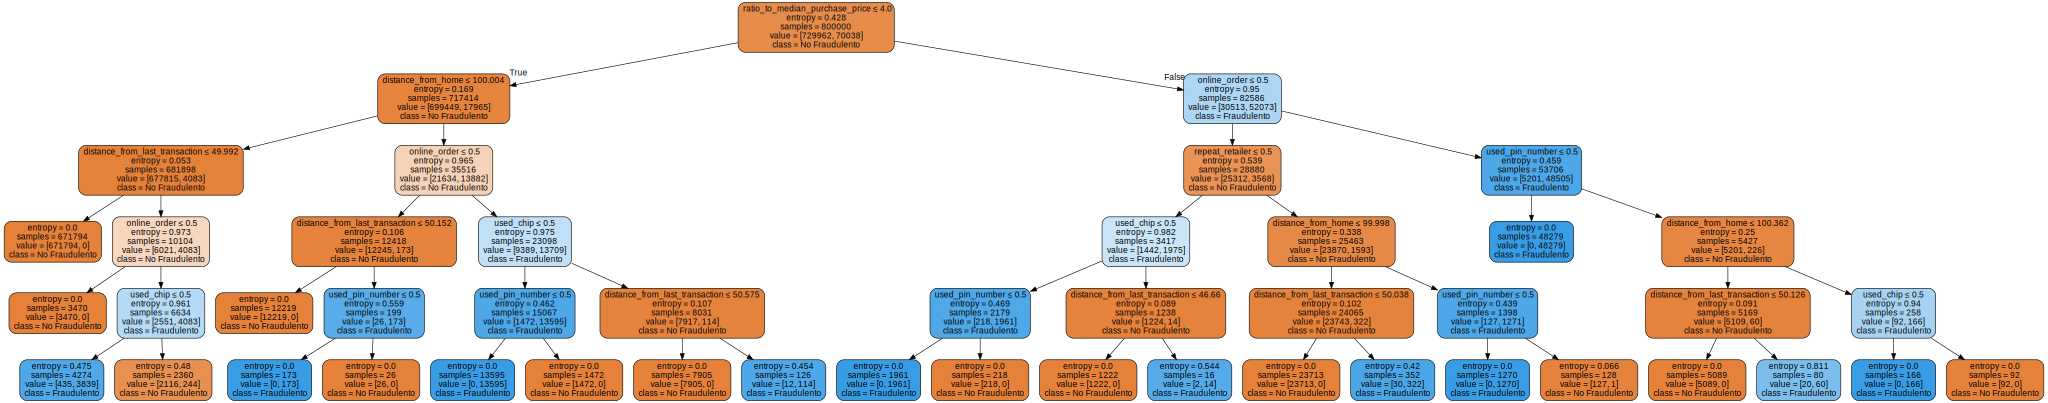

In [84]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(t_data.columns.values),
                                class_names=["No Fraudulento", "Fraudulento"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [85]:
y_respuesta = clf.predict(w_test_pred)
for real, prd in zip(w_true_pred, y_respuesta):
  print('Real {} => Predicción {}'.format(real, prd))

Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 1.0 => Predicción 1.0
Real 1.0 => Predicción 1.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0
Real 0.0 => Predicción 0.0


## Evaluación del árbol de decisión

In [86]:
y_respuesta = clf.predict(w_test)

In [87]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Precisión del árbol de decisión: {}%'.format(acc * 100))

Precisión del árbol de decisión: 99.8895%


<AxesSubplot:>

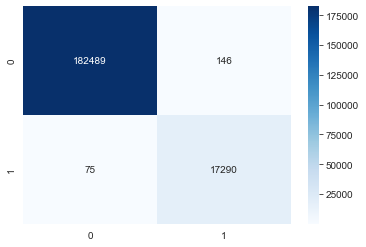

In [88]:
cfm = metrics.confusion_matrix(w_true, y_respuesta)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='g')

# Modelo Neuronal con Keras

### Variable para almacenar las puntuaciones

In [89]:
modelScores = []

## Normalización de la data

In [90]:
scaler = StandardScaler()
dframeKeras.iloc[:,0:-1] = scaler.fit_transform(dframeKeras.iloc[:,0:-1].to_numpy())

## Separar la data en variables de entrenamiento y variables de prueba

In [91]:
trainKeras, testKeras = train_test_split(dframeKeras, test_size=0.2)

## Definir data y target

In [92]:
## para entrenar
t_data = trainKeras[trainKeras.columns[0:7]]
t_target = trainKeras[trainKeras.columns[7]]
## para predicciones
w_test_pred = testKeras[testKeras.columns[0:7]].iloc[10:20]
w_true_pred = testKeras[testKeras.columns[7]].iloc[10:20]
## para validar el accuracy
w_test = testKeras[testKeras.columns[0:7]]
w_true = testKeras[testKeras.columns[7]]

## Definir cuando nuestro entrenamiento se
> En este caso se define que detendremos el entrenamiento cuando el accuracy no aumente en 2 iteraciones

In [93]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=2,
    verbose=0,
    mode="max"
)

## Crear el modelo de la red neuronal

In [94]:
def get_basic_model(learning_rate):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

## Entrenar el modelo 1 con aprendizaje 0.01

In [95]:
model = get_basic_model(0.01)
historial = model.fit(t_data, t_target, epochs=15, verbose=True, callbacks=[callback], validation_split=0.2)

Epoch 1/15
20000/20000 [==============================] - 14s 671us/step - loss: 0.0206 - accuracy: 0.9924 - val_loss: 0.0125 - val_accuracy: 0.9951
Epoch 2/15
20000/20000 [==============================] - 13s 670us/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.0105 - val_accuracy: 0.9954
Epoch 3/15
20000/20000 [==============================] - 13s 643us/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0065 - val_accuracy: 0.9976
Epoch 4/15
20000/20000 [==============================] - 13s 660us/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0075 - val_accuracy: 0.9973
Epoch 5/15
20000/20000 [==============================] - 13s 632us/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0067 - val_accuracy: 0.9973
Epoch 6/15
20000/20000 [==============================] - 13s 668us/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0082 - val_accuracy: 0.9972
Epoch 7/15
20000/20000 [==============================] - 14s 696us/step - loss: 0.0072 - accuracy: 0.9976

## Graficar la pérdida y la precisión del modelo 1

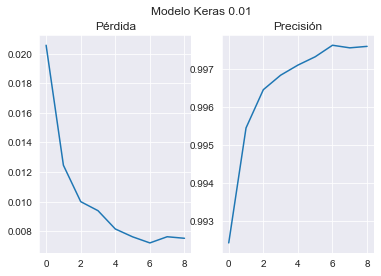

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modelo Keras 0.01')
ax1.set_title('Pérdida')
ax1.plot(historial.history['loss'])
ax2.set_title('Precisión')
ax2.plot(historial.history['accuracy'])
plt.show()

## Predicción de la data con el modelo 1

In [97]:
pred = model.predict(w_test_pred)
for real, prd in zip(w_true_pred, pred):
  print('Real {} => Predicción {}'.format(real, prd))

1/1 [==============================] - 0s 39ms/step
Real 0.0 => Predicción [-16.359362]
Real 0.0 => Predicción [-39.58312]
Real 0.0 => Predicción [-43.10239]
Real 0.0 => Predicción [-225.92656]
Real 0.0 => Predicción [-198.87283]
Real 0.0 => Predicción [-424.04382]
Real 0.0 => Predicción [-4.4019904]
Real 0.0 => Predicción [-9.670302]
Real 0.0 => Predicción [-23.293333]
Real 1.0 => Predicción [10.903242]


## Agregar los datos de precisión y pérdida al historial

In [98]:
modelScores.append(model.evaluate(w_test, w_true))

6250/6250 [==============================] - 3s 480us/step - loss: 0.0070 - accuracy: 0.9977


## Entrenar el modelo 2 con aprendizaje 0.1

In [99]:
model = get_basic_model(0.1)
historial = model.fit(t_data, t_target, epochs=15, verbose=True, callbacks=[callback], validation_split=0.2)

Epoch 1/15
20000/20000 [==============================] - 14s 666us/step - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.0506 - val_accuracy: 0.9837
Epoch 2/15
20000/20000 [==============================] - 13s 644us/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 3/15
20000/20000 [==============================] - 13s 641us/step - loss: 0.0629 - accuracy: 0.9845 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 4/15
20000/20000 [==============================] - 14s 700us/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.0642 - val_accuracy: 0.9783
Epoch 5/15
20000/20000 [==============================] - 15s 735us/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.0519 - val_accuracy: 0.9826
Epoch 6/15
20000/20000 [==============================] - 15s 740us/step - loss: 0.0614 - accuracy: 0.9831 - val_loss: 0.0399 - val_accuracy: 0.9889


## Graficar la pérdida y la precisión del modelo 2

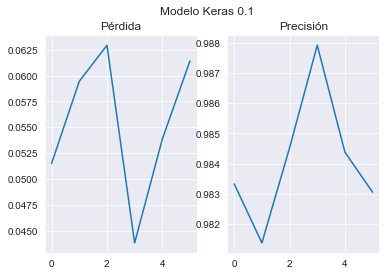

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modelo Keras 0.1')
ax1.set_title('Pérdida')
ax1.plot(historial.history['loss'])
ax2.set_title('Precisión')
ax2.plot(historial.history['accuracy'])
plt.show()

## Predicción de la data con el modelo 2

In [101]:
pred = model.predict(w_test_pred)
for real, prd in zip(w_true_pred, pred):
  print('Real {} => Predicción {}'.format(real, prd))

1/1 [==============================] - 0s 40ms/step
Real 0.0 => Predicción [-2.5137563]
Real 0.0 => Predicción [-44.670467]
Real 0.0 => Predicción [-42.80424]
Real 0.0 => Predicción [-866.23004]
Real 0.0 => Predicción [-739.3351]
Real 0.0 => Predicción [-1051.9376]
Real 0.0 => Predicción [-2.5137563]
Real 0.0 => Predicción [-19.677258]
Real 0.0 => Predicción [-48.50485]
Real 1.0 => Predicción [2.5576315]


## Agregar los datos de precisión y pérdida al historial

In [102]:
modelScores.append(model.evaluate(w_test, w_true))

6250/6250 [==============================] - 3s 554us/step - loss: 0.0396 - accuracy: 0.9891


## Entrenar el modelo 3 con aprendizaje 0.5

In [103]:
model = get_basic_model(0.5)
historial = model.fit(t_data, t_target, epochs=15, verbose=True, callbacks=[callback], validation_split=0.2)

Epoch 1/15
20000/20000 [==============================] - 16s 765us/step - loss: 0.3019 - accuracy: 0.9127 - val_loss: 0.3039 - val_accuracy: 0.9126
Epoch 2/15
20000/20000 [==============================] - 15s 731us/step - loss: 0.3022 - accuracy: 0.9127 - val_loss: 0.3247 - val_accuracy: 0.9126
Epoch 3/15
20000/20000 [==============================] - 14s 718us/step - loss: 0.3020 - accuracy: 0.9127 - val_loss: 0.2975 - val_accuracy: 0.9126
Epoch 4/15
20000/20000 [==============================] - 14s 722us/step - loss: 0.3018 - accuracy: 0.9127 - val_loss: 0.2973 - val_accuracy: 0.9126


## Graficar la pérdida y la precisión del modelo 3

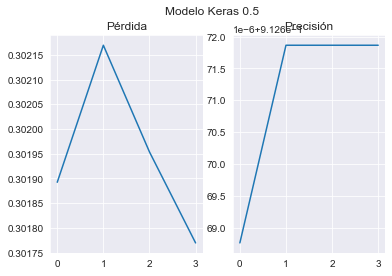

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modelo Keras 0.5')
ax1.set_title('Pérdida')
ax1.plot(historial.history['loss'])
ax2.set_title('Precisión')
ax2.plot(historial.history['accuracy'])
plt.show()

## Predicción de la data con el modelo 3

In [105]:
pred = model.predict(w_test_pred)
for real, prd in zip(w_true_pred, pred):
  print('Real {} => Predicción {}'.format(real, prd))

1/1 [==============================] - 0s 45ms/step
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 0.0 => Predicción [-2.195908]
Real 1.0 => Predicción [-2.195908]


## Agregar los datos de precisión y pérdida al historial

In [106]:
modelScores.append(model.evaluate(w_test, w_true))

6250/6250 [==============================] - 3s 554us/step - loss: 0.2980 - accuracy: 0.9123


## Cambiar topología de la red neuronal
> Como tuvimos buenos resultado con el aprendizaje 0.01, procedemos a cambiar la topología de la red neuronal manteniendo este ritmo.

## Funciones para armar los modelos

## Modelo 4
### Se cambia:
- Número de neuronas en la capa oculta
- Nueva capa oculta
- Distinto optimizador

In [107]:
def get_model_RMSprop(learning_rate):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1)
  ])
## Cambiamos el optimizador a RMSprop
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

## Modelo 5
### Se cambia:
- Mismo número de neuronas y capas del modelo anterior
- Distinto optimizador

In [108]:
def get_model_SGD(learning_rate):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

## Modelo con topología nueva (SGD) con aprendizaje 0.01

In [109]:
model = get_model_SGD(0.01)
historial = model.fit(t_data, t_target, epochs=15, verbose=True, callbacks=[callback], validation_split=0.2)

Epoch 1/15
20000/20000 [==============================] - 15s 736us/step - loss: 0.0583 - accuracy: 0.9763 - val_loss: 0.0219 - val_accuracy: 0.9921
Epoch 2/15
20000/20000 [==============================] - 14s 724us/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.0153 - val_accuracy: 0.9950
Epoch 3/15
20000/20000 [==============================] - 14s 724us/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0145 - val_accuracy: 0.9941
Epoch 4/15
20000/20000 [==============================] - 15s 727us/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 0.0091 - val_accuracy: 0.9973
Epoch 5/15
20000/20000 [==============================] - 14s 721us/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 6/15
20000/20000 [==============================] - 15s 726us/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0064 - val_accuracy: 0.9974
Epoch 7/15
20000/20000 [==============================] - 15s 726us/step - loss: 0.0080 - accuracy: 0.9971

## Graficar la pérdida y la precisión

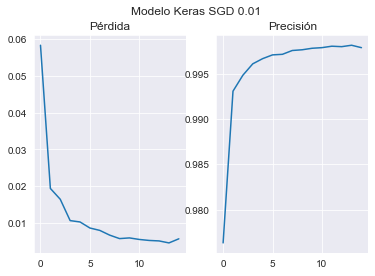

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modelo Keras SGD 0.01')
ax1.set_title('Pérdida')
ax1.plot(historial.history['loss'])
ax2.set_title('Precisión')
ax2.plot(historial.history['accuracy'])
plt.show()

## Predicción de la data con el modelo 4

In [111]:
pred = model.predict(w_test_pred)
for real, prd in zip(w_true_pred, pred):
  print('Real {} => Predicción {}'.format(real, prd))

1/1 [==============================] - 0s 51ms/step
Real 0.0 => Predicción [-22.113228]
Real 0.0 => Predicción [-69.05756]
Real 0.0 => Predicción [-69.68832]
Real 0.0 => Predicción [-44.155308]
Real 0.0 => Predicción [-40.43072]
Real 0.0 => Predicción [-71.500145]
Real 0.0 => Predicción [-1.273993]
Real 0.0 => Predicción [-45.57522]
Real 0.0 => Predicción [-64.35333]
Real 1.0 => Predicción [11.242969]


## Agregar los datos de precisión y pérdida al historial

In [112]:
modelScores.append(model.evaluate(w_test, w_true))

6250/6250 [==============================] - 3s 543us/step - loss: 0.0041 - accuracy: 0.9985


# Modelo con topología nueva (RMSprop) con aprendizaje 0.01

In [113]:
model = get_model_RMSprop(0.01)
historial = model.fit(t_data, t_target, epochs=15, verbose=True, callbacks=[callback], validation_split=0.2)

Epoch 1/15
20000/20000 [==============================] - 16s 769us/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0213 - val_accuracy: 0.9918
Epoch 2/15
20000/20000 [==============================] - 15s 733us/step - loss: 0.0252 - accuracy: 0.9935 - val_loss: 0.0516 - val_accuracy: 0.9940
Epoch 3/15
20000/20000 [==============================] - 14s 705us/step - loss: 0.0384 - accuracy: 0.9928 - val_loss: 0.0196 - val_accuracy: 0.9943
Epoch 4/15
20000/20000 [==============================] - 14s 702us/step - loss: 0.0572 - accuracy: 0.9924 - val_loss: 0.0420 - val_accuracy: 0.9956


## Graficar la pérdida y la precisión

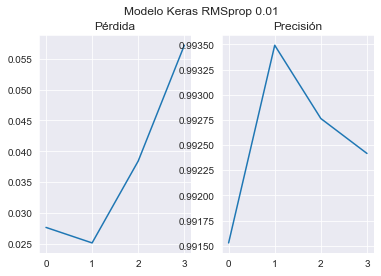

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modelo Keras RMSprop 0.01')
ax1.set_title('Pérdida')
ax1.plot(historial.history['loss'])
ax2.set_title('Precisión')
ax2.plot(historial.history['accuracy'])
plt.show()

## Predicción de la data con el modelo 5

In [115]:
pred = model.predict(w_test_pred)
for real, prd in zip(w_true_pred, pred):
  print('Real {} => Predicción {}'.format(real, prd))

1/1 [==============================] - 0s 42ms/step
Real 0.0 => Predicción [-21.534573]
Real 0.0 => Predicción [-53.77244]
Real 0.0 => Predicción [-38.22755]
Real 0.0 => Predicción [-43.56947]
Real 0.0 => Predicción [-41.313488]
Real 0.0 => Predicción [-221.57578]
Real 0.0 => Predicción [-5.077366]
Real 0.0 => Predicción [-26.80334]
Real 0.0 => Predicción [-15.476147]
Real 1.0 => Predicción [26.538982]


## Agregar los datos de precisión y pérdida al historial

In [116]:
modelScores.append(model.evaluate(w_test, w_true))

6250/6250 [==============================] - 3s 490us/step - loss: 0.0520 - accuracy: 0.9955


## Comparar los modelos con el accuracy

In [117]:
for score in modelScores:
  print('Precisión: {}  Pérdida: {}'.format(score[1], score[0]))

Precisión: 0.9976599812507629  Pérdida: 0.007022859062999487
Precisión: 0.9890999794006348  Pérdida: 0.0396265909075737
Precisión: 0.9123250246047974  Pérdida: 0.2980145215988159
Precisión: 0.9984949827194214  Pérdida: 0.004139263182878494
Precisión: 0.9955499768257141  Pérdida: 0.0519871711730957
